Número óptimo de clusters (codo): 4


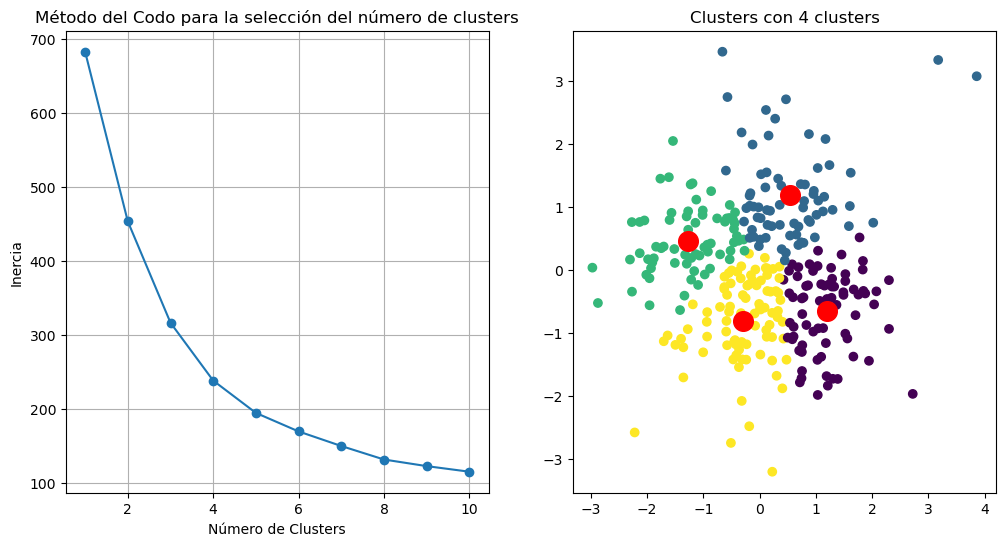

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Genera datos de prueba
np.random.seed(100)
data = np.random.randn(300, 2)  # Datos bidimensionales

# Parámetros del algoritmo
max_iterations = 100
tolerance = 1e-4

# Lista para almacenar las inercias
inertias = []

# Rango de números de clusters a probar
K = range(1, 11)

for k in K:
    # Inicialización: Elije centros iniciales aleatorios
    initial_centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Asigna cada punto al cluster más cercano
        distances = np.linalg.norm(data[:, np.newaxis] - initial_centers, axis=2)
        labels = np.argmin(distances, axis=1)

        # Calcula nuevos centros como el promedio de los puntos en cada cluster
        new_centers = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Comprueba la convergencia
        if np.all(np.isclose(initial_centers, new_centers, atol=tolerance)):
            break

        initial_centers = new_centers

    # Calcula la varianza intra-cluster
    inertia = 0
    for i in range(k):
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            cluster_center = initial_centers[i]
            inertia += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1) ** 2)
    inertias.append(inertia)

# Gráfico del método del codo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para la selección del número de clusters')
plt.grid()

# Encuentra el codo (elbow) en el gráfico
kneedle = KneeLocator(K, inertias, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f"Número óptimo de clusters (codo): {optimal_k}")

# Genera los clusters con el número óptimo
# Inicialización: Elije centros iniciales aleatorios
initial_centers = data[np.random.choice(data.shape[0], optimal_k, replace=False)]

for _ in range(max_iterations):   
    # Asigna cada punto al cluster más cercano
    distances = np.linalg.norm(data[:, np.newaxis] - initial_centers, axis=2)
    labels = np.argmin(distances, axis=1)

    # Calcula nuevos centros como el promedio de los puntos en cada cluster
    new_centers = np.array([data[labels == i].mean(axis=0) for i in range(optimal_k)])

    # Comprueba la convergencia
    if np.all(np.isclose(initial_centers, new_centers, atol=tolerance)):
        break

    initial_centers = new_centers

# Visualiza los resultados de los clusters
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], s=200, c='red')
plt.title(f'Clusters con {optimal_k} clusters')
plt.show()

C:\Users\flore\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\flore\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


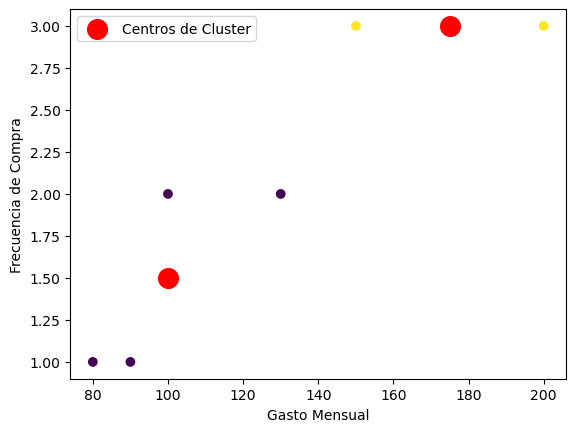

In [10]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos de ejemplo: gasto mensual y frecuencia de compra de clientes
clientes = np.array([[100, 2], [150, 3], [200, 3], [80, 1], [130, 2], [90, 1]])

# Entrenar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(clientes)

# Etiquetas de cluster asignadas a cada cliente
labels = kmeans.labels_

# Visualizar los clusters
plt.scatter(clientes[:, 0], clientes[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centros de Cluster')
plt.xlabel('Gasto Mensual')
plt.ylabel('Frecuencia de Compra')
plt.legend()
plt.show()

C:\Users\flore\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\flore\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


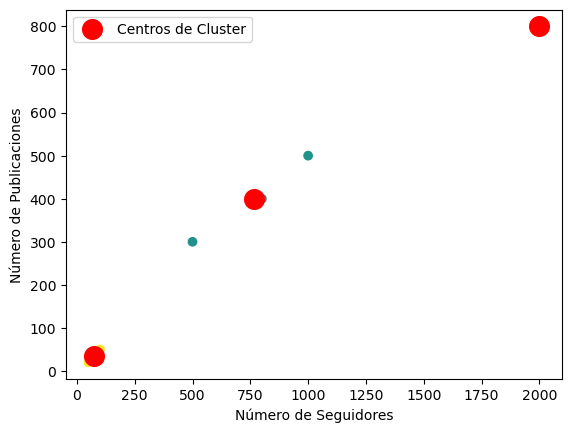

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos de ejemplo: número de seguidores y número de publicaciones de usuarios
usuarios = np.array([[1000, 500], [500, 300], [100, 50], [2000, 800], [800, 400], [50, 20]])

# Entrenar el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(usuarios)

# Etiquetas de cluster asignadas a cada usuario
labels = kmeans.labels_

# Visualizar los clusters
plt.scatter(usuarios[:, 0], usuarios[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centros de Cluster')
plt.xlabel('Número de Seguidores')
plt.ylabel('Número de Publicaciones')
plt.legend()
plt.show()